In [1]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
from shapely.geometry import Point, LineString
import networkx as nx
import numpy as np
import pandas as pd

In [ ]:
def shortest_path(G, orig, dest):
    try:
        return ox.shortest_path(G, orig, dest, weight='travel_time')
    except:
        # for unsolvable routes (due to directed graph perimeter effects)
        return None

In [ ]:

# create iterable parameters (O-D pairs) for each function run
nodes = np.array(G.nodes())
origs = np.random.choice(nodes, size=n, replace=True)
dests = np.random.choice(nodes, size=n, replace=True)
params = ((G, orig, dest) for orig, dest in zip(origs, dests))

In [2]:
place = {"city": "Wuerzburg", "country": "Germany"}
G = ox.graph_from_place(place, network_type = "drive")

In [28]:
def shortest_path(G, orig, dest):
    try:
        return nx.shortest_path_length(G, orig, dest, weight="length")
    except:
        return None

In [25]:
shortest_path(G, origs,  dests)

In [24]:
shortest_path(Gs, origs, dests)

In [6]:
nodes = np.array(G.nodes())
nodes

array([    580993,   10799058,   10799066, ..., 8917704496, 8917704497,
       8981470540], dtype=int64)

In [4]:
origs = np.array(G.nodes())
dests = np.array(G.nodes())

In [ ]:
shortest_path(nodes, origs, dests)

In [ ]:
G.nodes()

In [ ]:
# OPTION 1: recursively remove unsolvable origin/destination nodes and re-try
G2 = G.copy()
solved = False
while not solved:
    try:
        orig_node = ox.get_nearest_node(G2, orig_point)
        dest_node = ox.get_nearest_node(G2, dest_point)
        print(nx.shortest_path_length(G2, orig_node, dest_node, weight='length'))
        solved = True
    except nx.exception.NetworkXNoPath:
        G2.remove_nodes_from([orig_node, dest_node])
    
# OPTION 2: use a strongly (instead of weakly) connected graph
Gs = ox.utils_graph.get_largest_component(G, strongly=True)
orig_node = ox.get_nearest_node(Gs, orig_point)
dest_node = ox.get_nearest_node(Gs, dest_point)
nx.shortest_path_length(Gs, orig_node, dest_node, weight='length')

In [29]:
Gs = ox.utils_graph.get_largest_component(G, strongly=True)

In [33]:
def shortest_path_str(Gs, orig, dest):
    try:
        return nx.shortest_path_length(Gs, orig, dest, weight="length")
    except:
        return None

In [31]:
nodes = np.array(Gs.nodes())
nodes

array([  10799058,   10799066,   10799083, ..., 8917704496, 8917704497,
       8981470540], dtype=int64)

In [32]:
origs = np.array(Gs.nodes())
dests = np.array(Gs.nodes())

In [37]:
shortest_path_str(Gs, origs, dests)

In [66]:
# This generates a Distance matrix based on real street distances
# Trick was to get the Strongly connected network which removes the nodes placed on the Autobahn (These were unreachable from other nodes)
G = ox.graph_from_place("Wuerzburg, Germany", network_type = "drive")
Gs = ox.utils_graph.get_largest_component(G, strongly = True)
mat_generator = nx.all_pairs_dijkstra_path_length(Gs, weight = "length")
mat_dict = dict(mat_generator)
mat = pd.DataFrame(mat_dict).round(1)
mat = mat.rename_axis("osmid").sort_values(by = ["osmid"])
mat

,10799058,10799066,10799083,10799085,10799087,10799937,10799942,10799945,10799947,10799949,...,8684424129,8917651907,8917667635,8917667643,8917704467,8917704493,8917704495,8917704496,8917704497,8981470540
osmid,,,,,,,,,,,,,,,,,,,,,
10799058,0.0,4595.5,93.1,650.3,389.9,2857.6,3326.5,3247.3,3233.5,3263.2,...,5808.1,10274.0,10505.1,10563.3,6711.6,6754.4,6745.1,6752.8,6765.9,5583.3
10799066,470.5,0.0,412.6,323.3,709.4,3177.1,3646.0,3566.8,3553.0,3582.8,...,6127.6,10593.5,10824.6,10882.8,7031.1,7073.9,7064.6,7072.3,7085.4,5902.8
10799083,704.3,4502.4,0.0,557.2,296.8,2764.5,3233.4,3154.2,3140.4,3170.1,...,5715.0,10180.9,10412.0,10470.2,6618.5,6661.3,6652.0,6659.7,6672.8,5490.2
10799085,147.2,4591.7,89.3,0.0,386.1,2853.8,3322.6,3243.4,3229.7,3259.4,...,5804.3,10270.2,10501.2,10559.5,6707.8,6750.6,6741.3,6749.0,6762.1,5579.5
10799087,4676.1,4205.6,4618.2,4528.9,0.0,2467.7,2936.5,2857.4,2843.6,2873.3,...,5418.2,9884.1,10115.1,10173.4,6321.7,6364.5,6355.2,6362.9,6376.0,5193.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8917704493,7226.1,6755.6,7168.2,7078.9,7465.0,5017.7,4447.3,4368.1,4354.4,4384.1,...,6231.5,3519.6,3750.7,3808.9,62.4,0.0,36.6,22.0,11.6,1728.2
8917704495,7211.7,6741.2,7153.8,7064.5,7450.6,5003.3,4432.9,4353.7,4340.0,4369.7,...,6217.1,3528.9,3759.9,3818.2,48.0,9.3,0.0,7.7,20.8,1713.9
8917704496,7204.0,6733.5,7146.1,7056.9,7442.9,4995.6,4425.3,4346.1,4332.3,4362.1,...,6209.4,3543.4,3774.5,3832.7,40.4,23.8,14.5,0.0,35.4,1706.2


In [62]:
# maybe sample not from this DF but just from OSMIDs and then join the distances into a new DF
gdf_nodes, gdf_edges = ox.graph_to_gdfs(Gs)
nodes_df = gdf_nodes[["y", "x"]].copy()
nodes_df.columns = ["lat", "lon"]
nodes_df

,lat,lon
osmid,,
10799058,49.751452,9.926904
10799066,49.753819,9.928881
10799083,49.751798,9.927970
10799085,49.751011,9.927733
10799087,49.754406,9.928837
...,...,...
8917704493,49.804200,9.918704
8917704495,49.804163,9.918820
8917704496,49.804228,9.918785


In [64]:
sample_nodes_df = nodes_df.sample(n = 5, random_state= 3)
Nodes_S = sample_nodes_df.index.values
Nodes_S.tolist()

[6034416208, 40932452, 248813018, 1032261863, 51519006]

In [94]:
type(Nodes_S)

numpy.ndarray

In [71]:
empty_df = pd.DataFrame(index=Nodes_S)
empty_df= empty_df.reindex(columns=list(Nodes_S))
empty_df= empty_df.rename_axis("osmid")
empty_df

,6034416208,40932452,248813018,1032261863,51519006
osmid,,,,,
6034416208,NaN,NaN,NaN,NaN,NaN
40932452,NaN,NaN,NaN,NaN,NaN
248813018,NaN,NaN,NaN,NaN,NaN
1032261863,NaN,NaN,NaN,NaN,NaN
51519006,NaN,NaN,NaN,NaN,NaN


In [111]:
# This seems to work, create empty df with index from sampled Nodes. Then join from complete Distance Matrix and remove every column that is not in the index
empty_df2 = pd.DataFrame(index=Nodes_S)
empty_df2 = empty_df2.rename_axis("osmid")
empty_df2 = empty_df2.merge(mat, left_index=True, right_index=True)
empty_df2 = empty_df2[empty_df2.columns.intersection(Nodes_S)]
empty_df2 = empty_df2.sort_values(by = ["osmid"])
empty_df2

,40932452,51519006,248813018,1032261863,6034416208
osmid,,,,,
40932452,0.0,2699.7,3233.9,7753.9,2758.3
51519006,2747.7,0.0,4925.7,6705.2,866.6
248813018,3607.9,5299.8,0.0,8650.4,5508.2
1032261863,7461.7,6670.8,8926.9,0.0,6879.2
6034416208,2381.7,866.6,5134.1,6913.6,0.0


In [103]:
merger = empty_df.merge(mat, left_on=Nodes_S, right_on=Nodes_S, how = "inner")
merger

KeyError: array([6034416208,   40932452,  248813018, 1032261863,   51519006],
      dtype=int64)

In [63]:
mat_loc = mat.iloc[0:50,0:50]
mat_loc

,10799058,10799066,10799083,10799085,10799087,10799937,10799942,10799945,10799947,10799949,...,21276528,21286327,21286375,21286381,21286405,21286462,21287776,21287802,21287811,21287814
OSMID,,,,,,,,,,,,,,,,,,,,,
10799058,0.0,4595.5,93.1,650.3,389.9,2857.6,3326.5,3247.3,3233.5,3263.2,...,7086.4,9658.5,9255.3,9342.2,8576.3,9552.4,4736.8,8076.6,8481.3,8246.4
10799066,470.5,0.0,412.6,323.3,709.4,3177.1,3646.0,3566.8,3553.0,3582.8,...,7405.9,9978.0,9574.8,9661.7,8895.8,9871.9,5056.3,8396.1,8800.8,8565.9
10799083,704.3,4502.4,0.0,557.2,296.8,2764.5,3233.4,3154.2,3140.4,3170.1,...,6993.3,9565.4,9162.2,9249.1,8483.2,9459.3,4643.7,7983.5,8388.2,8153.3
10799085,147.2,4591.7,89.3,0.0,386.1,2853.8,3322.6,3243.4,3229.7,3259.4,...,7082.5,9654.6,9251.5,9338.4,8572.4,9548.6,4733.0,8072.8,8477.5,8242.5
10799087,4676.1,4205.6,4618.2,4528.9,0.0,2467.7,2936.5,2857.4,2843.6,2873.3,...,6696.4,9268.6,8865.4,8952.3,8186.3,9162.5,4346.9,7686.7,8091.4,7856.4
10799937,2208.4,1737.9,2150.5,2061.2,2447.3,0.0,5383.9,5304.7,5290.9,5320.7,...,9143.8,11715.9,11312.7,11399.6,10633.7,11609.8,6794.2,10134.0,10538.7,10303.8
10799942,2778.7,2308.3,2720.9,2631.6,3017.7,570.4,0.0,2313.9,2300.2,2329.9,...,5864.2,8725.1,8321.9,8408.9,7642.9,8619.0,3803.5,7143.3,7547.9,7313.0
10799945,2857.9,2387.5,2800.1,2710.8,3096.9,649.5,79.2,0.0,2379.4,2409.1,...,5943.4,8804.3,8401.1,8488.1,7722.1,8698.2,3882.7,7222.5,7627.1,7392.2
10799947,2895.1,2424.7,2837.3,2748.0,3134.1,686.8,116.4,37.2,0.0,29.7,...,4589.8,7561.1,7157.9,7244.9,6478.9,7455.0,2642.3,5965.3,6383.9,6149.0


In [45]:
mat_df = mat.sample(n = 5, random_state= 3).sample(n= 5, axis = 1, random_state=3)
mat_df

,6034416208,40932452,248813018,1032261863,51519006
2704047470,7202.6,8994.1,10808.9,4485.0,7145.7
1979806883,2769.6,2338.9,3668.4,5609.1,2561.2
248067208,6992.0,5824.3,5332.7,8598.2,6783.6
168485484,3864.6,6246.2,8473.9,8891.4,4626.4
4574059745,2903.3,2552.5,4236.3,5663.8,2694.9


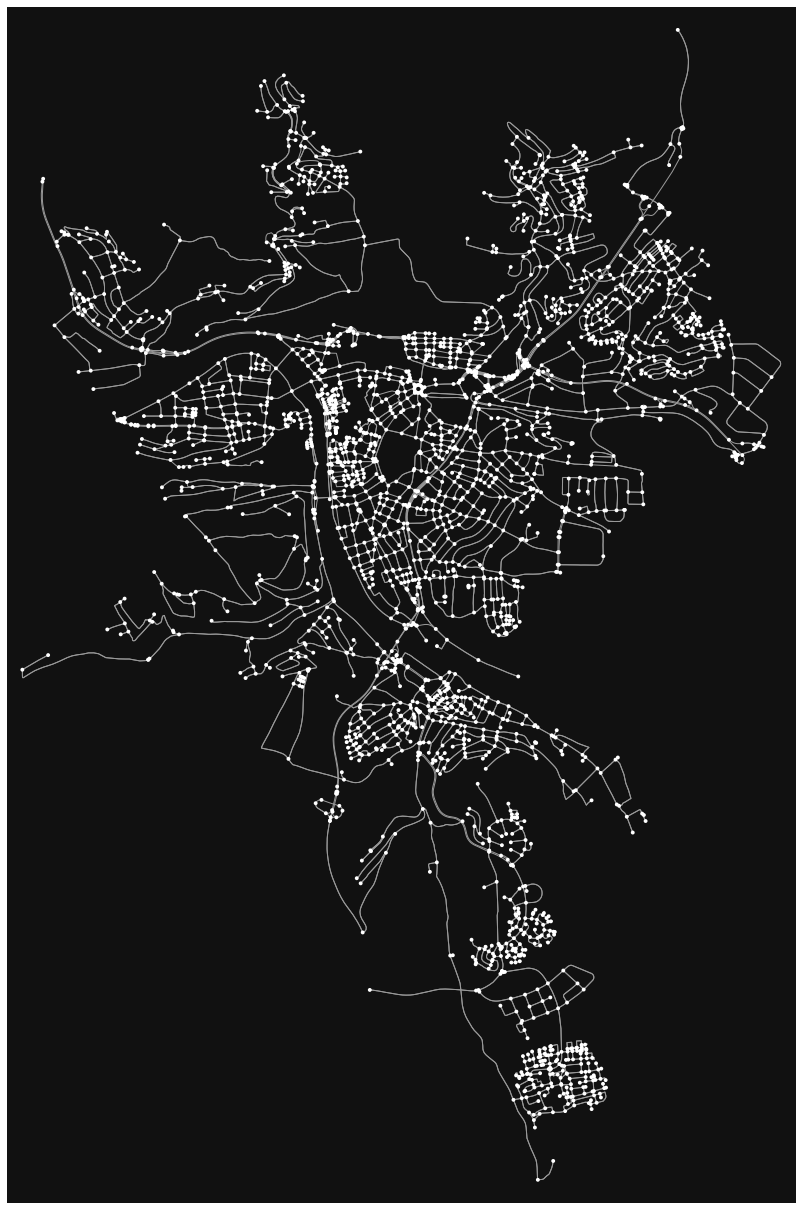

(<Figure size 1584x1584 with 1 Axes>, <AxesSubplot:>)

In [41]:
ox.plot_graph(Gs, figsize = (22,22))